<a href="https://colab.research.google.com/github/Tahsin-Azad-Tias/Thesis/blob/main/model/DL_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id "1FJTjHI3WvDLEAU1GPH9s7Uhi5sbCPXaY"
!gdown --id "1qYCf-RKv1q28OYDzYioZ1kKimIxDnz8B"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FJTjHI3WvDLEAU1GPH9s7Uhi5sbCPXaY
To: /content/train.csv
100% 15.8M/15.8M [00:00<00:00, 45.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qYCf-RKv1q28OYDzYioZ1kKimIxDnz8B
To: /content/test.csv
100% 4.34M/4.34M [00:00<00:00, 50.3MB/s]


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
X_train = train_df.drop(['label1','label_falut'], axis =1)
y_freq_train = train_df['label1'].astype(int)
y_fault_train = train_df['label_falut'].astype(int)

In [ ]:
X_test = test_df.drop(['label1','label_falut'], axis =1)
y_freq_test = test_df['label1'].astype(int)
y_fault_test = test_df['label_falut'].astype(int)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.297639,0.205715,-1.445339,0.138043,-0.025925,-2.083185,-0.654751,0.218002,0.715108,-0.626010,...,0.590212,-0.448230,-0.530842,-0.542794,1.320145,1.721702,1.827125,1.293097,0.632987,0.499707
1,0.612671,0.412815,-1.052995,-0.802563,-0.520758,-1.100657,0.082040,0.513884,0.475298,-0.295127,...,-0.436365,0.807788,-0.799098,0.440767,0.850914,-0.246414,-0.209578,-0.107226,0.193872,-0.416698
2,-0.856595,-0.380705,-1.047218,-0.378246,0.796028,-1.142484,-0.166047,-0.486184,-1.112462,0.046874,...,-0.039810,0.588766,-0.100935,-0.804614,0.067498,-0.122768,0.688677,-0.045386,0.018459,0.194292
3,-0.429678,-0.760051,-0.751340,1.256115,-0.475671,-0.145215,-1.281801,-0.616515,-0.624351,0.825960,...,1.017463,1.054957,1.862388,2.002589,0.015711,-0.362337,-0.890268,1.619069,-1.136229,1.340813
4,-0.931518,-0.391635,-1.044777,-0.187636,0.552180,-0.896201,-0.298272,-0.640623,-1.384410,0.238580,...,-0.001777,0.929588,-0.668088,0.039570,0.779120,-0.526614,-0.486924,-0.235112,-0.345948,-0.736096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,-0.915247,-0.073300,-0.667963,-0.551407,-0.162720,-1.494902,0.169222,0.729771,0.978776,-0.665532,...,-0.858696,0.743871,-1.037847,-0.025835,0.677042,-0.864619,-0.366901,0.064995,0.279170,-0.558880
16312,2.382632,0.325440,0.250747,-1.121755,0.305746,-0.978854,0.654206,0.135992,1.316205,2.443010,...,-0.460294,0.340509,0.488979,-0.441980,-0.551279,0.093060,-0.227890,-0.101581,-0.617314,0.386982
16313,-0.947538,-0.906462,-0.757750,-0.524462,-0.232609,0.195856,-0.187208,-0.732056,0.069982,0.617212,...,0.883266,-0.667102,0.352488,0.250693,-0.102698,-0.075756,0.307853,0.131423,-0.238486,-0.065702
16314,-0.581377,-1.087263,1.625737,0.518839,0.253525,0.234458,1.248498,-0.565703,-1.042268,-0.706032,...,0.584348,-0.187653,-0.590587,-0.178010,-0.821674,0.339035,0.981619,0.527043,-1.149272,0.811518


In [ ]:
0# Reshape the input data to be 3D for RNN
# The input shape for RNN should be (batch_size, timesteps, features)
X_train = X_train.values
X_test = X_test.values

features = X_train.shape[1]
timesteps = 1
X_train = X_train.reshape(X_train.shape[0], timesteps, features)
X_test = X_test.reshape(X_test.shape[0], timesteps, features)

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(64, activation='relu', input_shape=(timesteps, features),return_sequences=True))
# lstm_model.add(Dropout(0.2))

# lstm_model.add(LSTM(64, activation='relu',return_sequences=True))
# lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(32, activation='relu'))

lstm_model.add(Dense(21, activation='softmax'))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             29440     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 21)                693       
                                                                 
Total params: 42549 (166.21 KB)
Trainable params: 42549 (166.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_freq_train)
y_test_encoded = to_categorical(y_freq_test)
y_train_encoded.shape

(16316, 21)

In [ ]:
opt = keras.optimizers.Adamax(learning_rate=0.001)
lstm_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lstm_history = lstm_model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1, shuffle = True)

Epoch 1/20
230/230 [==============================] - 10s 14ms/step - loss: 2.7108 - accuracy: 0.5984 - val_loss: 1.8903 - val_accuracy: 0.7929
Epoch 2/20
230/230 [==============================] - 3s 13ms/step - loss: 0.7771 - accuracy: 0.9326 - val_loss: 0.1108 - val_accuracy: 1.0000
Epoch 3/20
230/230 [==============================] - 3s 14ms/step - loss: 0.0410 - accuracy: 0.9999 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 4/20
230/230 [==============================] - 2s 11ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 5/20
230/230 [==============================] - 2s 9ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/20
230/230 [==============================] - 2s 8ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 7/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
E

In [ ]:
# Model evaluation
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test, y_test_encoded)
print('Test loss:', loss_lstm, 'Test accuracy:', accuracy_lstm)

140/140 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.9145
Test loss: 0.6221373081207275 Test accuracy: 0.9144707322120667


In [ ]:
# Evaluate the model
y_pred_lstm = lstm_model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("Accuracy:  %.5f" %accuracy_lstm)

# Calculate precision
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
print("Precision:  %.5f" % precision_lstm)

# Calculate recall
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
print("Recall:  %.5f" % recall_lstm)

# Calculate F1 score
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')
print("F1 Score:  %.5f" %f1_lstm)

# Generate classification report
report_lstm = classification_report(y_test, y_pred_lstm)
print("Classification Report:")
print(report_lstm)

# Calculate confusion matrix
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

140/140 [==============================] - 1s 2ms/step
Accuracy:  0.91447
Precision:  0.91621
Recall:  0.91447
F1 Score:  0.91486
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.98      0.89      0.94       189
           2       0.95      0.92      0.93       244
           3       0.87      0.91      0.89       217
           4       0.96      0.91      0.93       233
           5       0.96      0.91      0.94       232
           6       0.94      0.93      0.93       234
           7       0.99      0.90      0.94       206
           8       0.86      0.92      0.89       248
           9       0.95      0.96      0.96       188
          10       0.87      0.90      0.89       198
          11       0.92      0.91      0.91       211
          12       0.90      0.94      0.92       213
          13       0.83      0.86      0.84       139
          14       0.91      0.94   

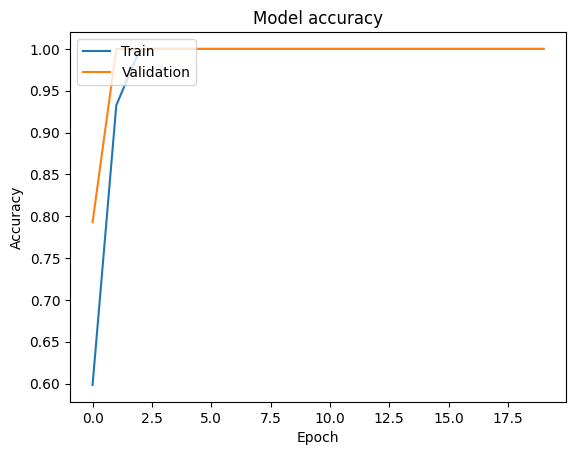

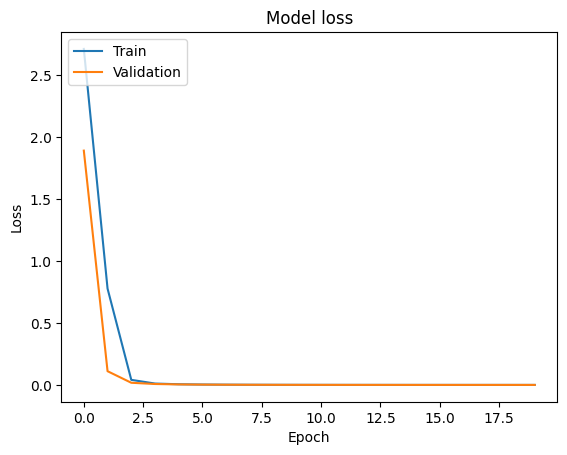

In [ ]:
# Plot training & validation accuracy values
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

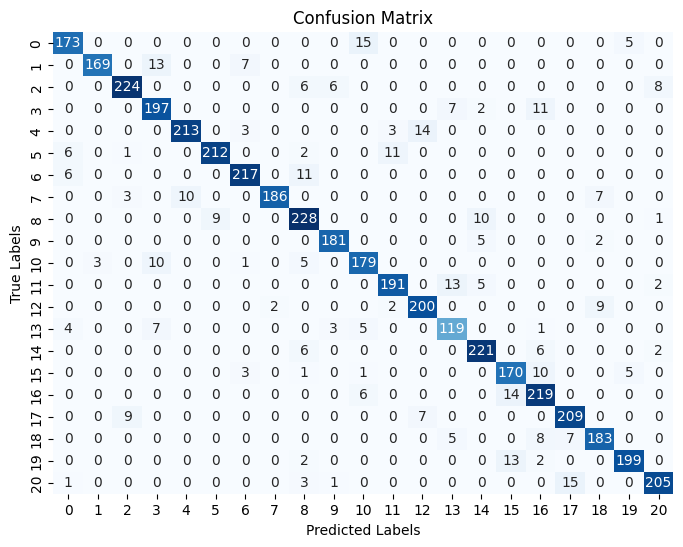

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_fault_train)
y_test_encoded = to_categorical(y_fault_test)
y_train_encoded.shape

(16316, 2)

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(64, activation='relu', input_shape=(timesteps, features),return_sequences=True))
# lstm_model.add(Dropout(0.2))

# lstm_model.add(LSTM(64, activation='relu',return_sequences=True))
# lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(32, activation='relu'))

lstm_model.add(Dense(2, activation='sigmoid'))

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             29440     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 41922 (163.76 KB)
Trainable params: 41922 (163.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adamax(learning_rate=0.001)
lstm_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1, shuffle = True)

Epoch 1/20
230/230 [==============================] - 5s 10ms/step - loss: 0.4080 - accuracy: 0.9461 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 2/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/20
230/230 [==============================] - 1s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 8.3299e-04 - val_accuracy: 1.0000
Epoch 4/20
230/230 [==============================] - 1s 5ms/step - loss: 5.6708e-04 - accuracy: 1.0000 - val_loss: 4.1957e-04 - val_accuracy: 1.0000
Epoch 5/20
230/230 [==============================] - 1s 5ms/step - loss: 3.0748e-04 - accuracy: 1.0000 - val_loss: 2.4467e-04 - val_accuracy: 1.0000
Epoch 6/20
230/230 [==============================] - 1s 5ms/step - loss: 1.8725e-04 - accuracy: 1.0000 - val_loss: 1.5500e-04 - val_accuracy: 1.0000
Epoch 7/20
230/230 [==============================] - 1s 4ms/step - loss: 1.2194e-04 - accuracy: 1.0000 - val_loss: 1.0

In [ ]:
# Model evaluation
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test, y_test_encoded)
print('Test loss:', loss_lstm, 'Test accuracy:', accuracy_lstm)

140/140 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.9544
Test loss: 0.3115793466567993 Test accuracy: 0.9544439315795898


In [ ]:
# Evaluate the model
y_pred_lstm = lstm_model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("Accuracy:  %.5f" %accuracy_lstm)

# Calculate precision
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
print("Precision:  %.5f" % precision_lstm)

# Calculate recall
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
print("Recall:  %.5f" % recall_lstm)

# Calculate F1 score
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')
print("F1 Score:  %.5f" %f1_lstm)

# Generate classification report
report_lstm = classification_report(y_test, y_pred_lstm)
print("Classification Report:")
print(report_lstm)

# Calculate confusion matrix
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

140/140 [==============================] - 1s 2ms/step
Accuracy:  0.95444
Precision:  0.95447
Recall:  0.95444
F1 Score:  0.95444
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2184
           1       0.95      0.96      0.96      2294

    accuracy                           0.95      4478
   macro avg       0.95      0.95      0.95      4478
weighted avg       0.95      0.95      0.95      4478



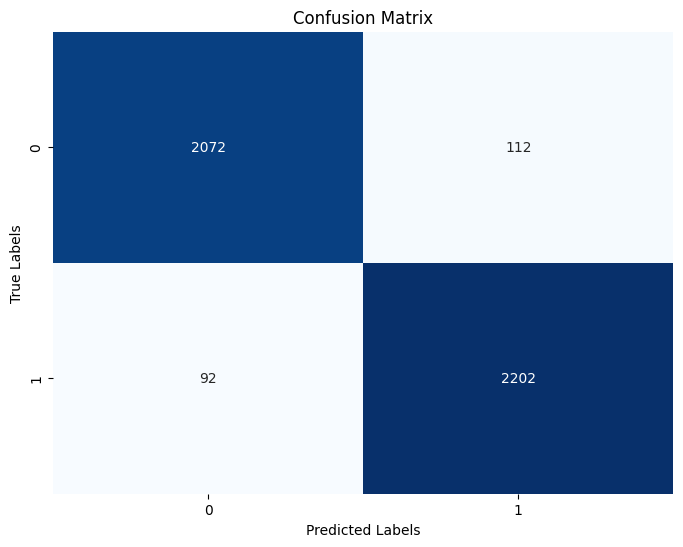

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()